![intro](./proj_intro.png)
## Proj 5: Object Detection+Object-level Scene Recognition 
Since the computational cost of training an entire scene recognition deep learning network is too high for most students, we intend to utilize open-source object detection APIs (mmdetection here) to first detect the common objects in the scene images. Based on the semantic information derived from object detection, a narrow network or machine learning methods can be adopted to further classify the scene.

### Object Detection API: [MMDetection](https://github.com/open-mmlab/mmdetection)
![mmdetectuib](./mmdet-logo.png)
1. Get start following [official document](https://mmdetection.readthedocs.io/zh_CN/latest/get_started.html)
   - pytorch >= 1.6.0 (cpuonly if no nvidia GPU card in your device.)
   - mmcv >= 2.0.0 
      ```
      pip install -U openmim 
      pip install chardet (Optional: if encounter "No module named 'chardet'")
      mim install mmengine 
      mim install "mmcv>=2.0.0"
      ```
   - mmdetection
      ```
      min install mmdet
      ```
   - Verify the installation [link](https://mmdetection.readthedocs.io/en/latest/get_started.html#verify-the-installation)
2. Inference Code with [RTMDet](https://arxiv.org/abs/2212.07784) (All object detection methods in MMDet you can try):

In [3]:
import mmcv
from mmdet.apis import init_detector, inference_detector

config_file = '../data/mmdet/rtmdet_tiny_8xb32-300e_coco.py'
checkpoint_file = '../data/mmdet/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
img = mmcv.imread('../data/demo.jpg', channel_order='rgb')
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
result = inference_detector(model, img)
print(result)

Loads checkpoint by local backend from path: ../data/mmdet/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

<DetDataSample(

    META INFORMATION
    img_shape: (640, 640)
    scale_factor: (1.0, 1.0)
    img_id: 0
    img_path: None
    batch_input_shape: (640, 640)
    pad_shape: (640, 640)
    ori_shape: (427, 640)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[220.5611, 176.5876, 456.2024, 383.3579],
                        [295.4567, 117.2802, 378.7524, 149.9798],
                        [431.2497, 104.4266, 485.1018, 132.0474],
                        ...,
                        [433.3729,  88.9164, 522.7392, 130.9076],
                        [355.7268, 114.7074, 382.2908, 147.6602],
                        [550.9922,  93.6001, 615

04/10 14:55:05 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


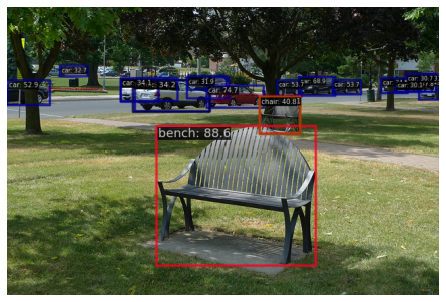

In [4]:
from mmdet.registry import VISUALIZERS

# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()

## Start the main body of this project!

### Collecting your scene datasets and inferencing them with Object Detection APIs.

In [5]:
# Your Code here